In [7]:
import pandas as pd
import xgboost as xgb
import function_collection as fc
from sklearn.metrics import *

In [2]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

X_train, y_train = fc.create_X_and_y(train)
X_test, y_test = fc.create_X_and_y(test)

In [18]:
model = xgb.XGBClassifier(objective='multi:softprob', eval_metric='auc', n_classes=28)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

print(y_test.nunique())
print(y_proba.shape)

accuracy = accuracy_score(y_test, y_pred)
#roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
print(accuracy)
#print(roc_auc)


/home/seba/.local/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:30:09] WARNING: ../src/learner.cc:541: 
Parameters: { n_classes } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


24
(836, 26)
0.21650717703349281


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

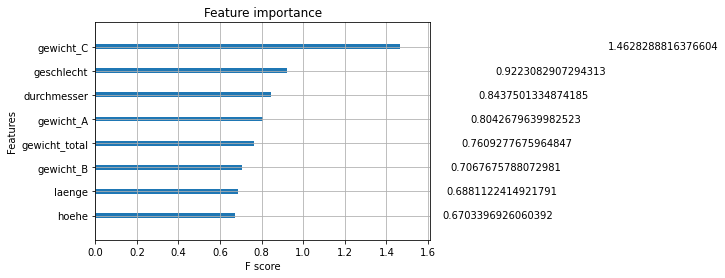

In [19]:
xgb.plot_importance(model, importance_type='gain')